# Big Sales Prediction using Random Forest Regressor
# YBIF Handson Project-07
# Yada Roshik
## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


## Get Information of DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## Get Column Names

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Get the Summary Statistics

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


## Get Missing Values Complete

In [7]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [10]:
import seaborn as sns

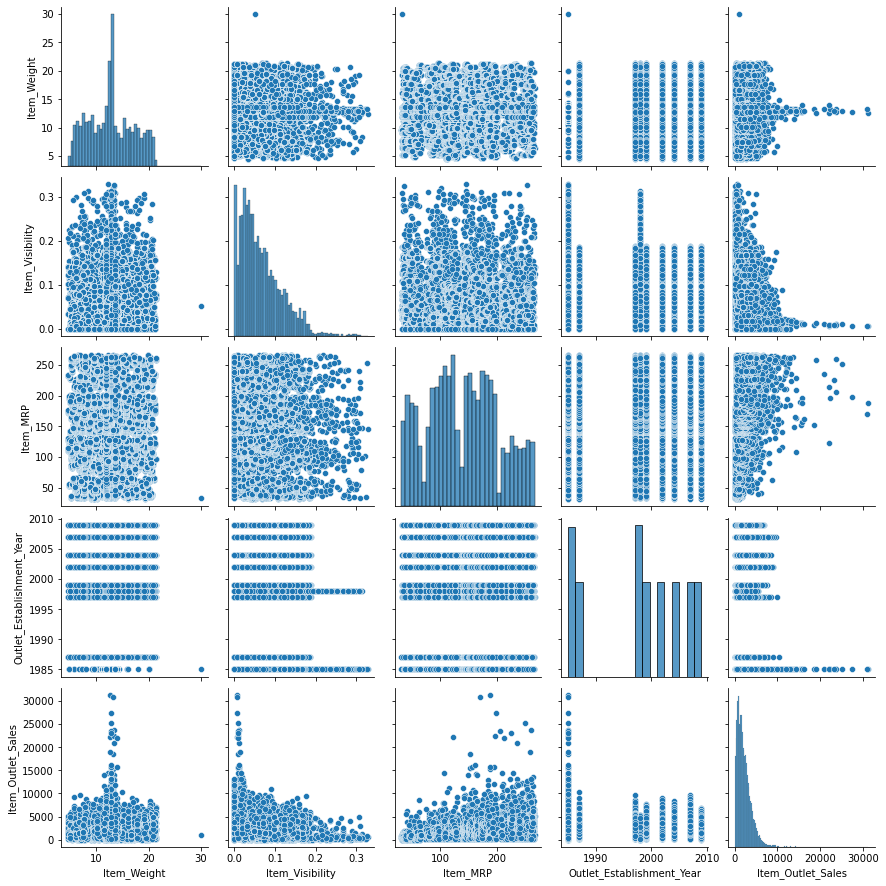

In [11]:
sns.pairplot(df)

## Get Categories and Counts of Categorical Variables

In [12]:
df[['Item_Identifier']].value_counts()

Item_Identifier
NCZ54              10
FDR07              10
FDR23              10
FDR21              10
FDR19              10
                   ..
FDO33               7
FDH58               7
FDX49               7
NCL42               7
NCW54               7
Length: 1559, dtype: int64

In [13]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [14]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}}, inplace=True)

In [15]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
dtype: int64

In [16]:
df.replace({'Item_Fat_Content':{'Low Fat':0, 'Regular':1}}, inplace=True)

In [17]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
dtype: int64

In [18]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,
            'Frozen Foods':0,'Dairy':0, 'Baking Goods':0, 
            'Canned':0, 'Health and Hygiene':1, 'Meat':0, 'Soft Drinks':0, 
            'Breads':0, 'Hard Drinks':0, 'Others':2, 'Starchy Foods':0,
             'Breakfast':0, 'Seafood':0}}, inplace=True)

In [19]:
df[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [20]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT049               1550
OUT046               1550
OUT035               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
dtype: int64

In [21]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,
             'OUT049':2, 'OUT046':3, 'OUT035':4,
              'OUT045':5,'OUT018':6, 'OUT017':7,
              'OUT010':8, 'OUT019':9}}, inplace=True)

In [22]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
4                    1550
3                    1550
2                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [23]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         7122
Small          5529
High           1553
dtype: int64

In [24]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1, 'High':2}}, inplace=True)

In [25]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [26]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5583
Tier 2                  4641
Tier 1                  3980
dtype: int64

In [27]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1, 'Tier 3':2}}, inplace=True)

In [28]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [29]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
dtype: int64

In [30]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3}}, inplace=True)

In [31]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9294
0              1805
3              1559
2              1546
dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


## Get Shape of DataFrame

In [34]:
df.shape

(14204, 12)

## Define y (dependent or label or target variable) and X (independent or features or attribute variable)

In [35]:
y=df['Item_Outlet_Sales']

In [36]:
y.shape

(14204,)

In [37]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [38]:
X=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [39]:
X.shape

(14204, 10)

In [40]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,2,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,4,2004,0,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,1,2,3


## Get X Variable Standardized

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc=StandardScaler()

In [43]:
X_std=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [44]:
X_std=sc.fit_transform(X_std)

In [45]:
X_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [46]:
X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]=pd.DataFrame(X_std, columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [47]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,2,0.139681,1,0,1
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,1
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,1,2,2
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,0,0
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,0,0.070990,0,1.947664,4,0.736955,0,1,1
14200,0.002201,0,0.078898,0,1.962160,7,1.095319,1,1,1
14201,0.002201,0,0.070120,0,1.965381,1,-1.293777,2,2,1
14202,0.204448,0,0.064694,0,1.973435,0,-1.532686,1,2,3


## Get Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=182529)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12783, 10), (1421, 10), (12783,), (1421,))

## Get Model Train

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr=RandomForestRegressor(random_state=182529)

In [53]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=182529)

## Get Model Prediction

In [54]:
y_pred=rfr.predict(X_test)

In [55]:
y_pred.shape

(1421,)

In [56]:
y_pred

array([1546.16114002, 1406.30124765, 1464.28124231, ..., 5122.78478359,
        667.96240774, 3205.3181532 ])

## Get Model Evaluation

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [58]:
mean_squared_error(y_test,y_pred)

1574823.2072410053

In [59]:
mean_absolute_error(y_test,y_pred)

832.8027943768368

In [60]:
r2_score(y_test,y_pred)

0.45420095377886294

## Get Visualization of Actual Vs Predicted Results

In [61]:
import matplotlib.pyplot as plt

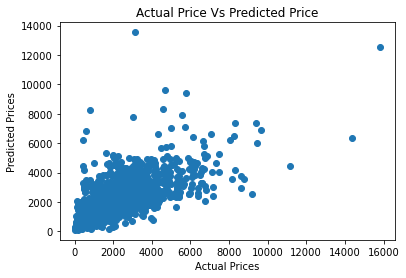

In [62]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Price")
plt.show()